# Logistic Regression — Detailed Overview

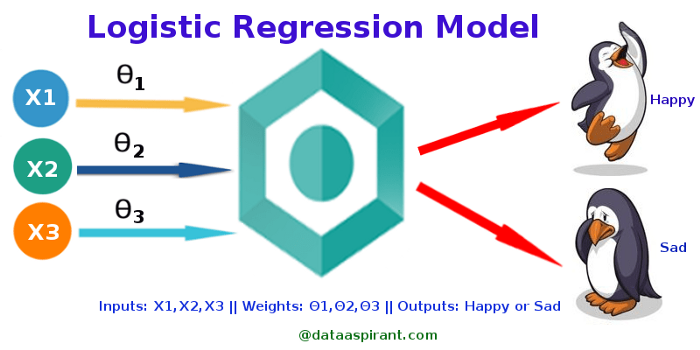

Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.

For example,
    <ul> To predict whether an email is spam (1) or (0) </ul>
    <ul> Whether the tumor is malignant (1) or not (0) </ul>

Consider a scenario where we need to classify whether an email is spam or not. If we use linear regression for this problem, there is a need for setting up a threshold based on which classification can be done. Say if the actual class is malignant, predicted continuous value 0.4 and the threshold value is 0.5, the data point will be classified as not malignant which can lead to serious consequence in real time.

From this example, it can be inferred that linear regression is not suitable for classification problem. Linear regression is unbounded, and this brings logistic regression into picture. Their value strictly ranges from 0 to 1.

## Simple Logistic Regression

<ul> Model </ul>

<ul> Output = 0 or 1 </ul>

<ul> Hypothesis => Z = WX + B </ul>

<ul> hΘ(x) = sigmoid (Z) </ul>

## Sigmoid Function

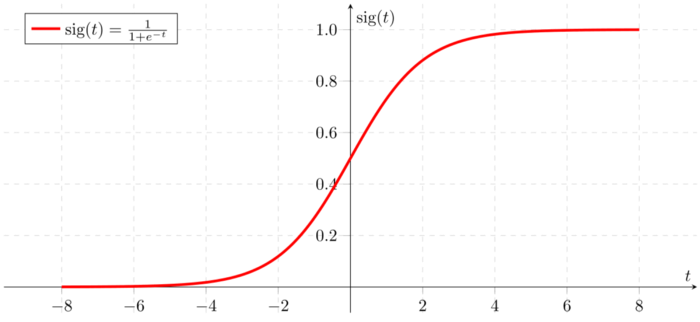

If ‘Z’ goes to infinity, Y(predicted) will become 1 and if ‘Z’ goes to negative infinity, Y(predicted) will become 0.

## Analysis of the hypothesis

The output from the hypothesis is the estimated probability. This is used to infer how confident can predicted value be actual value when given an input X. Consider the below example,

X = [x0 x1] = [1 IP-Address]

Based on the x1 value, let’s say we obtained the estimated probability to be 0.8. This tells that there is 80% chance that an email will be spam.

Mathematically this can be written as,

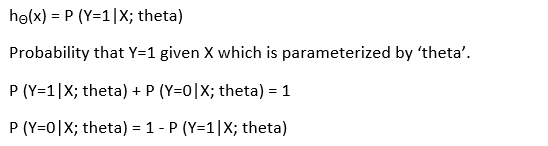

This justifies the name ‘logistic regression’. Data is fit into linear regression model, which then be acted upon by a logistic function predicting the target categorical dependent variable.

## Types of Logistic Regression

1. Binary Logistic Regression
The categorical response has only two 2 possible outcomes. Example: Spam or Not

2. Multinomial Logistic Regression
Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)

3. Ordinal Logistic Regression
Three or more categories with ordering. Example: Movie rating from 1 to 5

### Decision Boundary
To predict which class a data belongs, a threshold can be set. Based upon this threshold, the obtained estimated probability is classified into classes.

Say, if predicted_value ≥ 0.5, then classify email as spam else as not spam.
Decision boundary can be linear or non-linear. Polynomial order can be increased to get complex decision boundary.

### Cost Function

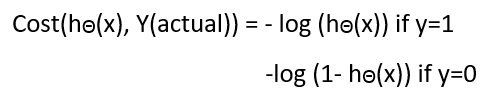

### Why cost function which has been used for linear can not be used for logistic?

Linear regression uses mean squared error as its cost function. If this is used for logistic regression, then it will be a non-convex function of parameters (theta). Gradient descent will converge into global minimum only if the function is convex.

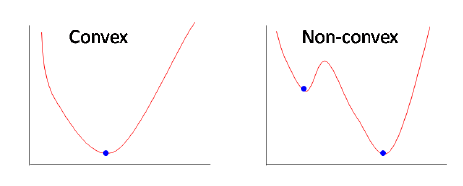

### Cost function explanation


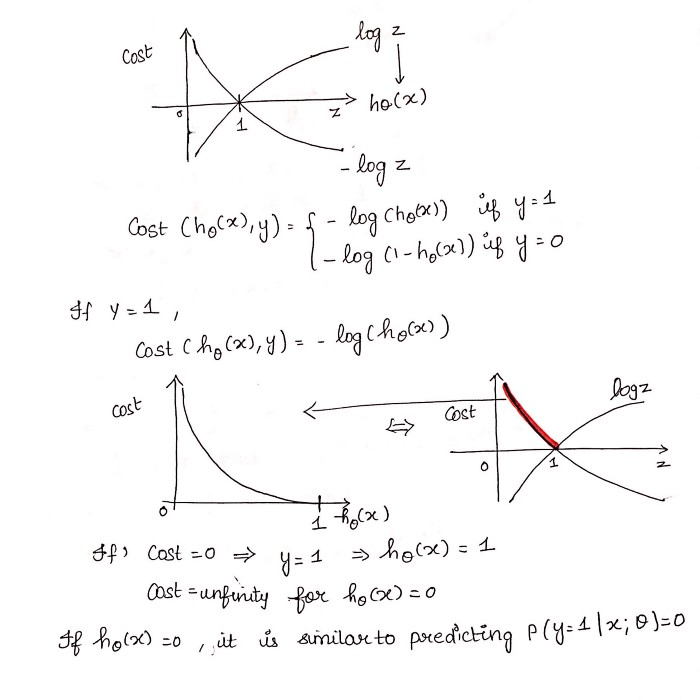

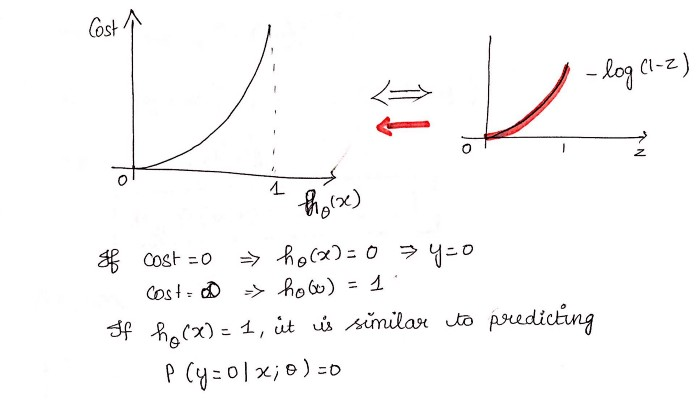

### Simplified cost function

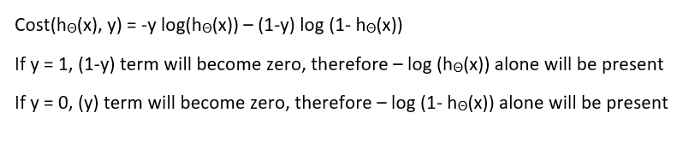

### Why this cost function?

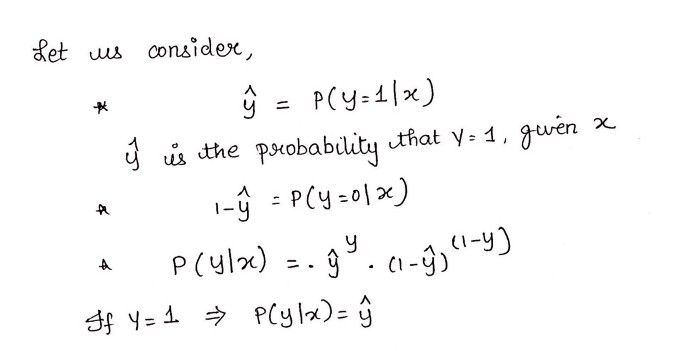

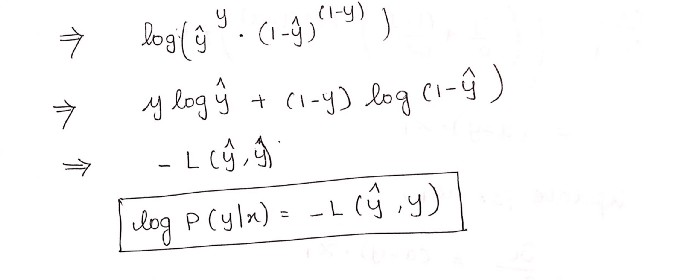

This negative function is because when we train, we need to maximize the probability by minimizing loss function. Decreasing the cost will increase the maximum likelihood assuming that samples are drawn from an identically independent distribution.

### Deriving the formula for Gradient Descent Algorithm


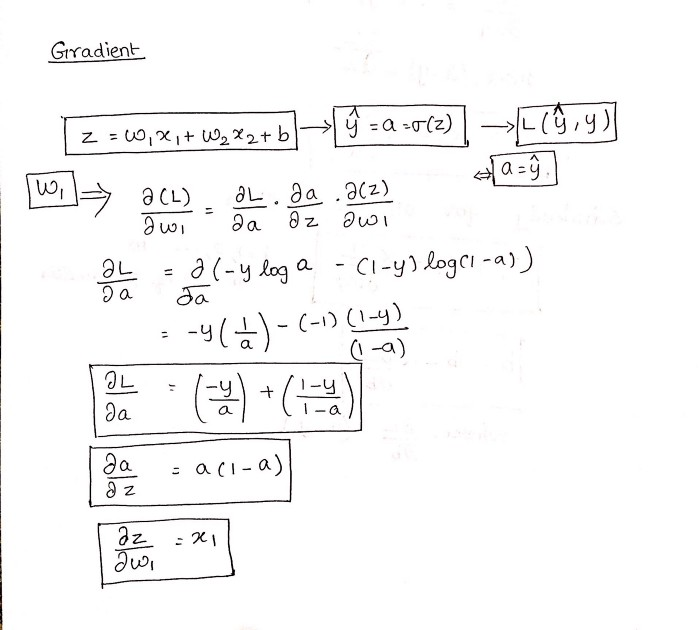

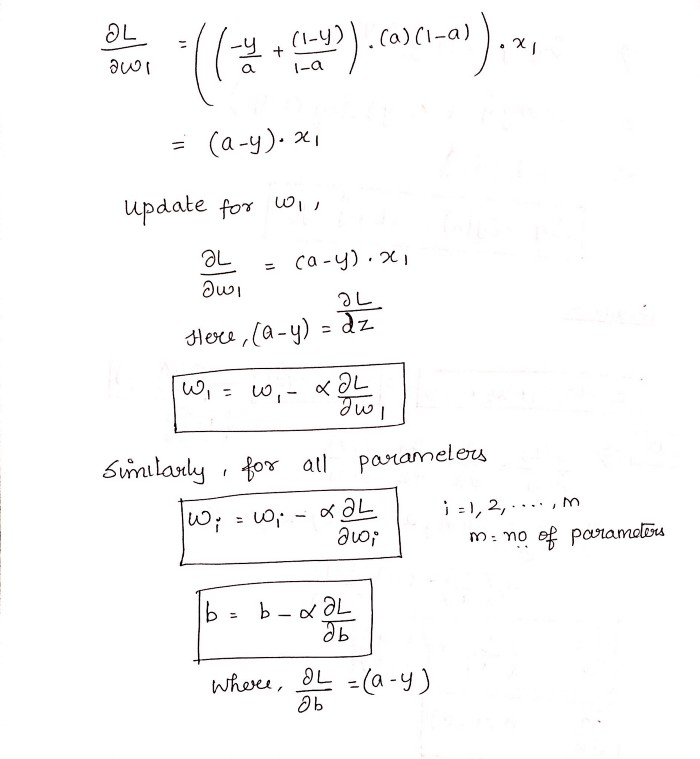

### Python Implementation

In [ ]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

### Cost vs Number_of_Iterations

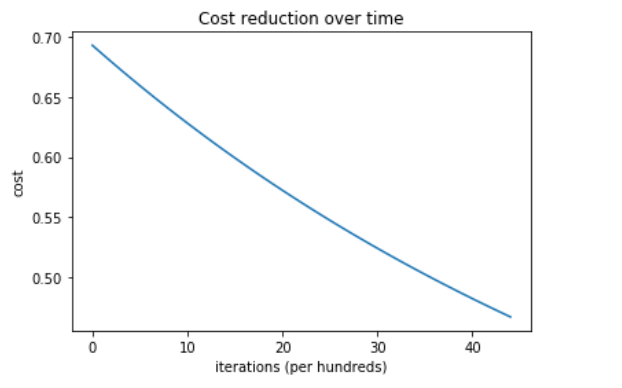

Train and test accuracy of the system is 100 %

This implementation is for binary logistic regression. For data with more than 2 classes, softmax regression has to be used.

This is an educational post and inspired from Prof. Andrew Ng’s deep learning course.